# Linear Algebra Final Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1: Logistic Regression
### 1.1: Visualizing:

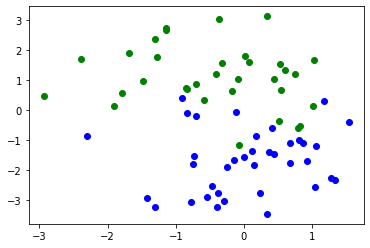

In [2]:
# # # visualizing 2d data
# raw_data = np.load('../Data/data2d.npz')
# X = raw_data['X']
# Y = np.array(raw_data['y'])

# z = X[Y == 1]
# plt.plot(z[:, 0], z[:, 1], 'bo')
# z = X[Y == 0]
# plt.plot(z[:, 0], z[:, 1], 'go')
# plt.show()

# visualizing 5d data
raw_data = np.load('../Data/data5d.npz')
X = raw_data['X']
Y = np.array(raw_data['y'])

z = X[Y == 1]
plt.plot(z[:, 0], z[:, 1], 'bo')
z = X[Y == 0]
plt.plot(z[:, 0], z[:, 1], 'go')
plt.show()

### 1.2: Computing Gradient
ax barge

### 1.3: Implementing Model and Gradient:

In [3]:
print("Pre:")
print(X.shape)
print(Y.shape)
#Reshape Data:
X = X.T
Y = Y.reshape(1, Y.shape[0])
print("Reshaped:")
print(X.shape)
print(Y.shape)

Pre:
(70, 5)
(70,)
Reshaped:
(5, 70)
(1, 70)


In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def Phi(X, w, b):
    return sigmoid(np.dot(w.T, X)+b)

def C(w,b, data):
    X, Y = data
    A = Phi(X, w, b)
#     print(A)
    return -1*np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

def compute_dC_dw(w,b, data):
    X, Y = data
    A = Phi(X, w, b)
    return np.dot(X, (A-Y).T)
    
def compute_dC_db(w,b, data):
    X, Y = data
    A = Phi(X, w, b)
    return np.sum(A-Y)

In [5]:
def compute_dC_dw_numeric(w,b, data, epsilon=1e-7):
    C_plus = np.zeros((w.shape[0], 1))
    C_minus = np.zeros((w.shape[0], 1))
    for i in range (w.shape[0]):
        theta_plus = np.copy(w)
        theta_plus[i] = theta_plus[i] + epsilon
        C_plus[i] = C(theta_plus, b, data)
        theta_minus = np.copy(w)
        theta_minus[i] = theta_minus[i] - epsilon
        C_minus[i] = C(theta_minus, b, data)
    return (C_plus-C_minus)/(2*epsilon)

def compute_dC_db_numeric(w,b, data, epsilon=1e-7):
    theta_plus = b + epsilon
    C_plus = C(w, theta_plus, data)
    theta_minus = b - epsilon
    C_minus = C(w, theta_minus, data)
    return (C_plus-C_minus)/(2*epsilon)

In [6]:
# raw_data = np.load('../Data/data5d.npz')
# X = raw_data['X']
# y = raw_data['y']
data = (X,Y)

w = np.random.randn(X.shape[0],1)
b = np.random.randn(1)

dC_dw = compute_dC_dw(w,b, data)
dC_db = compute_dC_db(w,b, data)

dC_dw_n = compute_dC_dw_numeric(w,b, data)
dC_db_n = compute_dC_db_numeric(w,b, data)

absolute_error_w = np.linalg.norm(dC_dw-dC_dw_n) # absolute error
relative_error_w = np.linalg.norm(dC_dw-dC_dw_n)/np.linalg.norm(dC_dw) # relative error

print(absolute_error_w)
print(relative_error_w)

absolute_error_b = dC_db - dC_db_n # absolute error
relative_error_b = (dC_db - dC_db_n)/dC_db # relative error

print(absolute_error_b)
print(relative_error_b)


2.6266358076670713e-07
2.2024784896168244e-09
-1.170010826001544e-07
5.603063831257079e-09


### 1.4 Implement Gradient Descent

In [ ]:
lamda = 0.009
thrsh = 0.1

w = np.zeros((X.shape[0], 1))
b = 0

while True:
    cost = C(w, b, data)
    print(cost)
    dC_dw = compute_dC_dw(w,b, data)
    dC_db = compute_dC_db(w,b, data)
    if (np.linalg.norm(dC_dw) < thrsh and np.linalg.norm(dC_db) < thrsh):
        break
    w = w - lamda * dC_dw
    b = b - lamda * dC_db

### 1.5 Compute the Training Error:

In [8]:
Y_prediction = np.zeros((1,X.shape[1]))
A = Phi(X, w, b)
for i in range(A.shape[1]):
    if A[0,i]>0.5:
        Y_prediction[0,i]=1
    else:
        Y_prediction[0,i]=0        

In [9]:
print(Y)
print(Y_prediction)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - Y)) * 100))

[[0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
  1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.]]
[[0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
  1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1.
  1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.]]
train accuracy: 100.0 %


### 1.6 Visualize

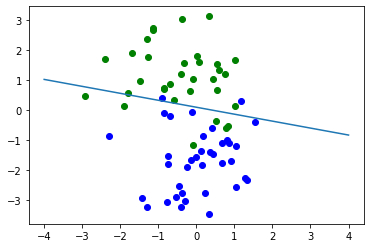

In [19]:
x_list = np.linspace(-4, 4, 100)
y_list = (w[0][0]*x_list + b)/(-w[1][0])
Y_prim = Y.reshape(X.shape[1])
X_prim = X.T
z = X_prim[Y_prim == 1]
plt.plot(z[:, 0], z[:, 1], 'bo')
z = X_prim[Y_prim == 0]
plt.plot(z[:, 0], z[:, 1], 'go')
# z = X_prim[np.abs(Y_prediction - Y).reshape(70) == 1]
# plt.plot(z[:, 0], z[:, 1], 'ro')
plt.plot(x_list, y_list)  
plt.show()

## Tensorflow Implementation

In [1]:
import tensorflow as tf

Xt = tf.convert_to_tensor(X)
Yt = tf.convert_to_tensor(Y)

print(Xt)
print(Yt)

AttributeError: module 'numpy' has no attribute 'typeDict'